<a href="https://colab.research.google.com/github/SAIRAALMAS88/SAIRAALMAS88/blob/main/EDA_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis in Python.

## Let us understand how to explore the data in python.


[Link to dataset for the activity](https://docs.google.com/spreadsheets/d/1kh-1WeapjSF8VDHOM2qqt7OeMNQNd_vhzeuz7-bM5sw/edit?usp=sharing)

## Introduction

**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

**How to perform Exploratory Data Analysis ?**

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.



---



## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computing
import seaborn as sns  # For statistical graphics
import matplotlib.pyplot as plt  # For plotting



---



## 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [2]:

df = pd.read_excel('/content/data (1).xlsx')

print(df.head())  # Display the first few rows of the DataFrame

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C



---



## 3. Checking the types of data

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [3]:

df.dtypes


,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object




---



## 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [4]:

df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
print(df.head())


  Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500  




---



## 5. Renaming the columns

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [5]:


df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
print(df.head())

  Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500  




---



## 6. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [6]:

# Drop duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(10925, 10)

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.



---



## 7. Dropping the missing or null values.

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [7]:

df.dropna(inplace=True)
df.shape

(10827, 10)

This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.



---



## 8. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

Outliers:
            Make Model  Year                Engine Fuel Type  Engine HP  \
294     Ferrari   360  2002     premium unleaded (required)      400.0   
295     Ferrari   360  2002     premium unleaded (required)      400.0   
296     Ferrari   360  2002     premium unleaded (required)      400.0   
297     Ferrari   360  2002     premium unleaded (required)      400.0   
298     Ferrari   360  2003     premium unleaded (required)      400.0   
...         ...   ...   ...                             ...        ...   
11736  Cadillac   XLR  2008                regular unleaded      320.0   
11737  Cadillac   XLR  2009  premium unleaded (recommended)      320.0   
11903       BMW    Z8  2001     premium unleaded (required)      394.0   
11904       BMW    Z8  2002     premium unleaded (required)      394.0   
11905       BMW    Z8  2003     premium unleaded (required)      394.0   

       Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
294                 

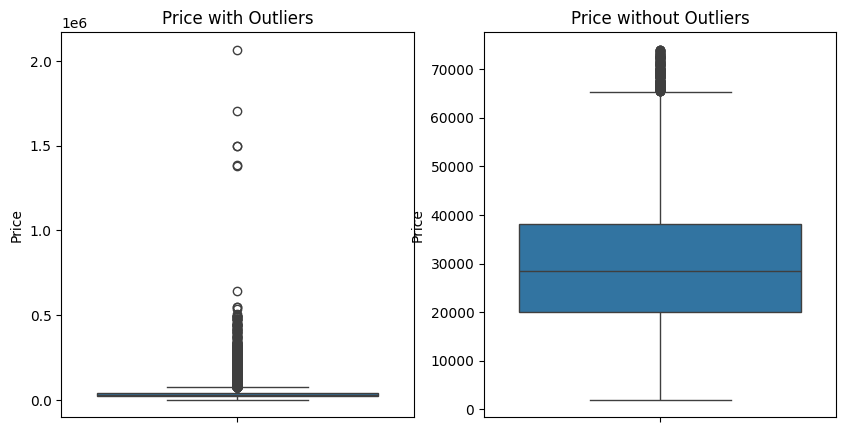

In [9]:


# Rename the 'MSRP' column to 'Price' and update the DataFrame
df = df.rename(columns={"MSRP": "Price"})  # This line was missing or not updating df

# Assuming 'Price' is the column with outliers
# Calculate Q1, Q3, and IQR for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("Outliers:\n", outliers)

# Remove outliers (optional)
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
print("\nDataFrame without outliers:\n", df_no_outliers)

# Visualize the data before and after removing outliers (optional)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Price'])  # Changed from 'MSRP' to 'Price'
plt.title('Price with Outliers')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['Price'])  # Changed from 'MSRP' to 'Price'
plt.title('Price without Outliers')
plt.show()

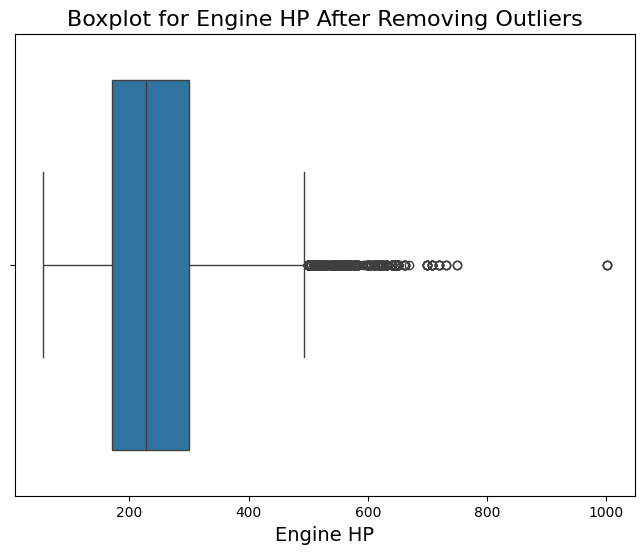

In [10]:
# boxplot for HP
# Plotting the boxplot for 'Engine HP' after removing outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Engine HP'])

# Add labels and title
plt.title('Boxplot for Engine HP After Removing Outliers', fontsize=16)
plt.xlabel('Engine HP', fontsize=14)

# Show the plot
plt.show()


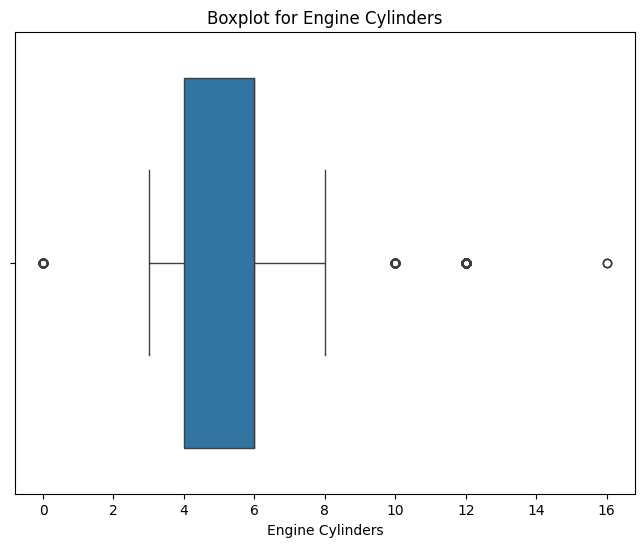

In [12]:
# boxplot for cylinders
# boxplot for cylinders
import matplotlib.pyplot as plt
import seaborn as sns

# Create a horizontal boxplot for Retail Price
plt.figure(figsize=(8, 6))  # Create a new figure for the boxplot
sns.boxplot(x='Engine Cylinders', data=df) # Boxplot for Retail Price
plt.title('Boxplot for Engine Cylinders')
plt.xlabel('Engine Cylinders')  # Label for the x-axis
plt.show()
plt.show()




---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

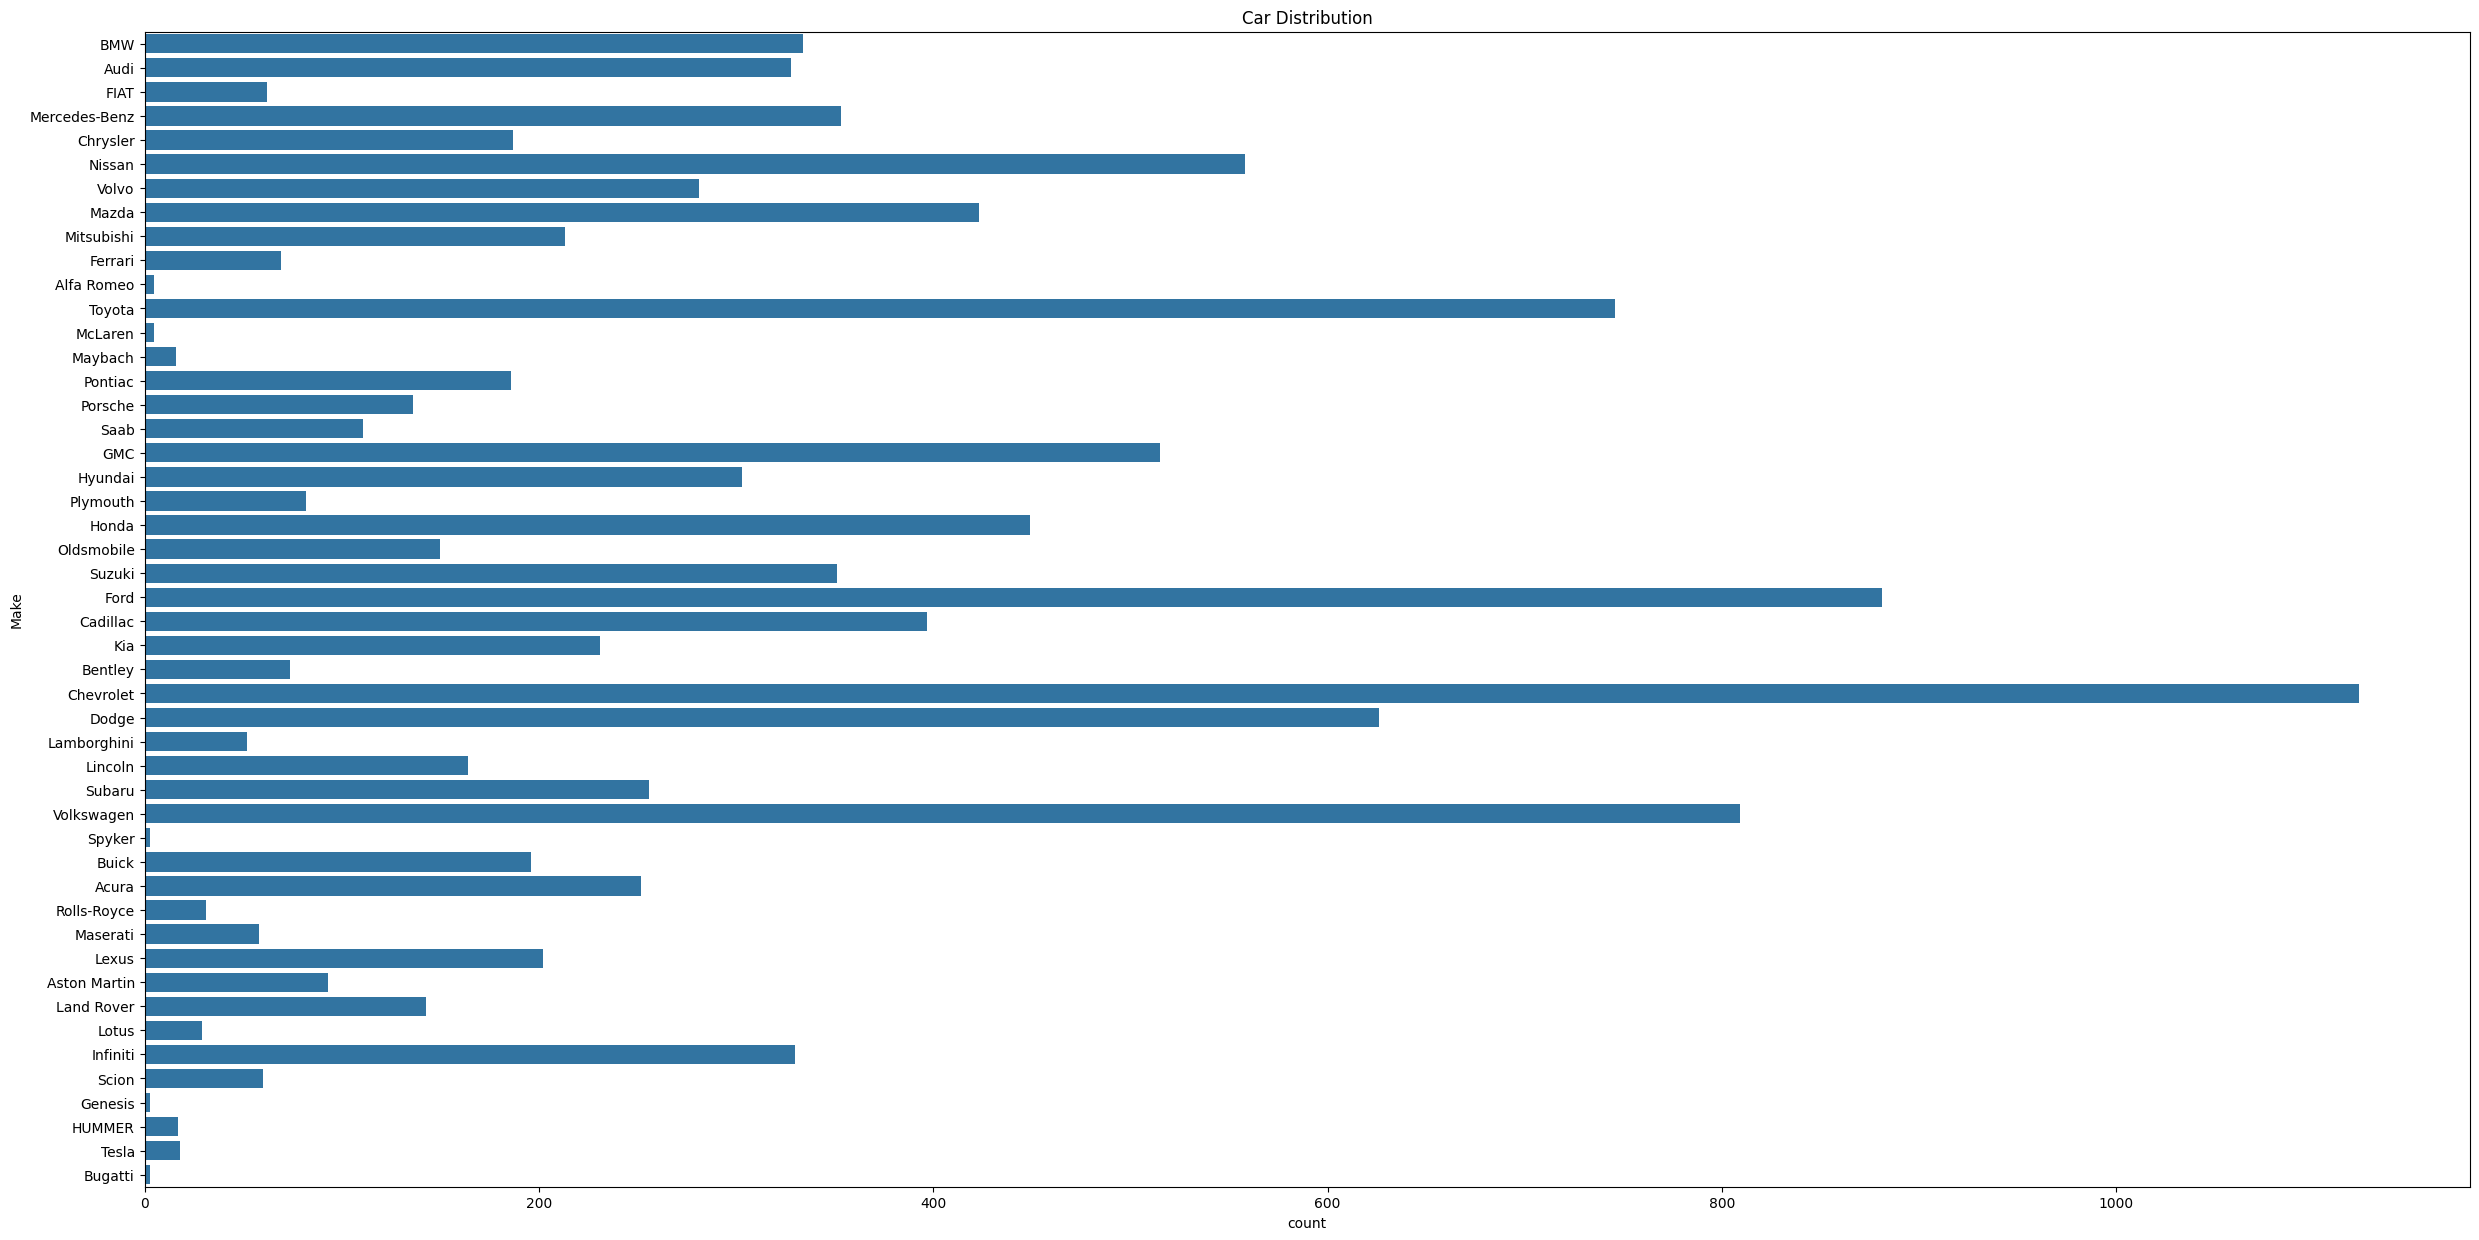

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.title('Car Distribution')
sns.countplot(df['Make'])
plt.show()

In [ ]:
# no of cars


### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

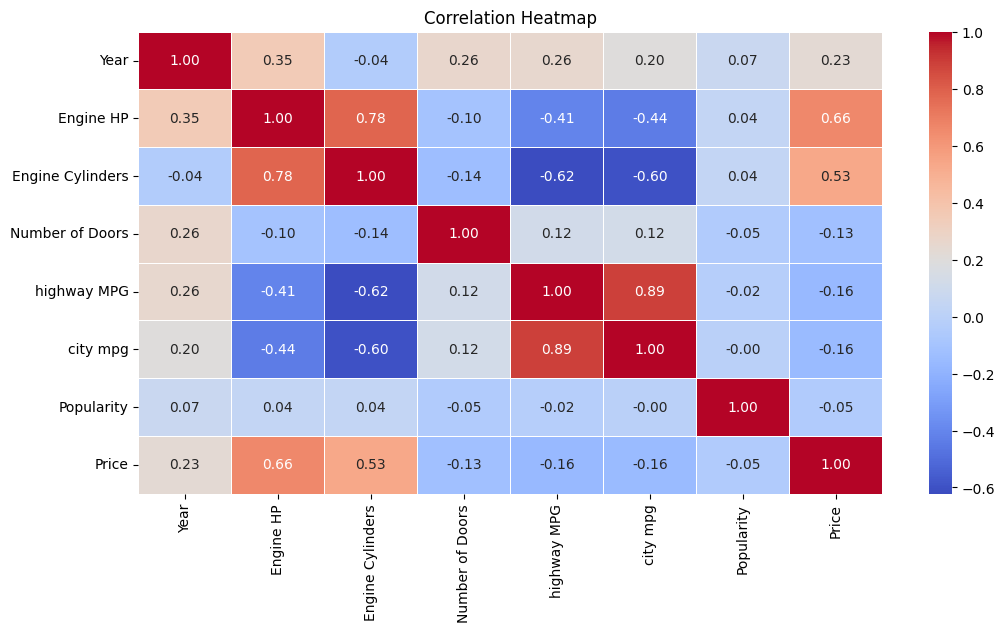

In [26]:
# features
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

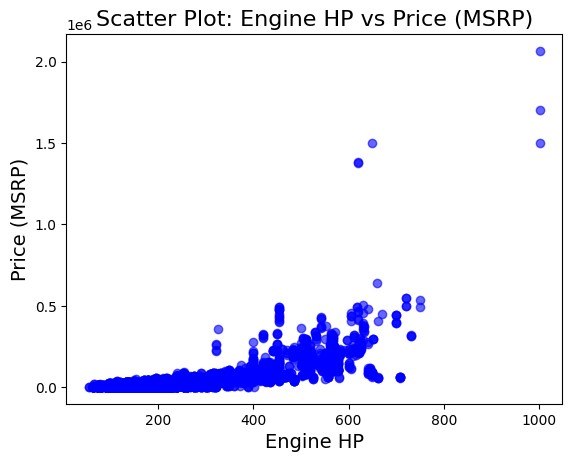

In [28]:
#scatter of ['HP'],['Price']

# Scatter plot using Matplotlib
plt.scatter(df['Engine HP'], df['Price'], color='blue', alpha=0.6)

# Add labels and title
plt.title('Scatter Plot: Engine HP vs Price (MSRP)', fontsize=16)
plt.xlabel('Engine HP', fontsize=14)
plt.ylabel('Price (MSRP)', fontsize=14)

# Show the plot
plt.show()




**Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA.
## Thank you.